In [1]:
# Installer les dépendances nécessaires
!pip install shap scikit-learn

In [2]:
# Importer les bibliothèques
import shap
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
# Charger le dataset California Housing
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [4]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Entraîner le modèle GradientBoostingRegressor avec les meilleurs paramètres
model = GradientBoostingRegressor(
    max_depth=5,
    learning_rate=0.3,
    n_estimators=120,
    max_features=None,
    random_state=42
)
model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.3, max_depth=5, n_estimators=120,
                          random_state=42)

In [6]:
# Initialiser l'explainer SHAP
explainer = shap.TreeExplainer(model)

In [7]:
# Calculer les valeurs SHAP pour les données de test
shap_values = explainer.shap_values(X_test)

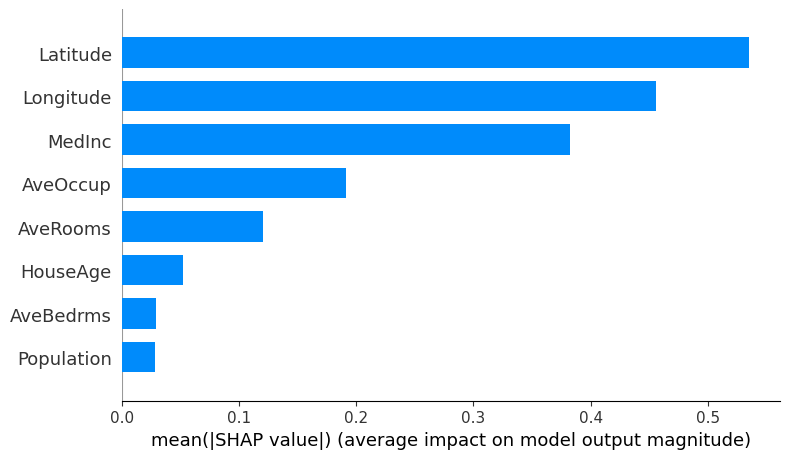

In [8]:
# Afficher un summary plot des importances globales
shap.summary_plot(shap_values, X_test, plot_type="bar")